In [2]:
import numpy as np
import os
import cv2

In [3]:
class label_info:
    id2color=np.array([
        [0,0,0],  # bg
        [0,0,255], #slow down
        [0,128,255],[255,128,0],[255,128,0],[255,192,64],[64,0,255],[128,0,255], # arrow
        [255,0,255], #crosswalk
        [0,255,0],[192,255,128],[210,210,210],[255,255,0],[128,128,128], # road lines
        [255,0,0], # stop line
        [64,192,64], # numbers
        [128,192,128], # texts
        [128,64,80], # others
    ])
    name2id={'background':0, 
             'slow down':1,
             'go ahead':2, 'turn right':3, 'turn left':4, 'ahead or turn right':5, 'ahead or turn left':6,
             'crosswalk':7,
             'double line(yellow)':8, 'double line(blue)':9, 'broken line(white)':10, 'single line(yellow)':11, 'single line(white)':12,
             'stop line':13,
             'numbers':14,
             'texts':15,
             'others':16}

data_root = 'F:\dataset\SeRM'
img_path = os.path.join(data_root, 'train')
label_path = os.path.join(data_root, 'trainannot')

In [4]:
def find_label_count(label_name, label_info=label_info):
    names = label_info.name2id.keys()
    counts = [0]*17
    # label_files = [[]]*17
    label_files = [[] for _ in range(17)]
    for file in os.listdir(label_path):
        file_path = os.path.join(label_path, file)
        mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        for label_name in names:
            id = label_info.name2id[label_name]
            equal = mask==id
            if np.any(equal):
                counts[id] += 1
                label_files[id].append(file_path)
                continue
    return counts,label_files

In [5]:
label_infos = label_info
counts,label_files = find_label_count('numbers', label_infos)
pass

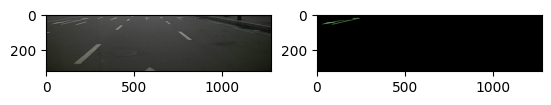

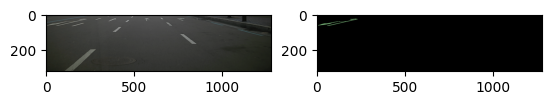

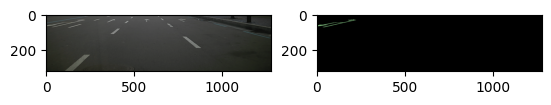

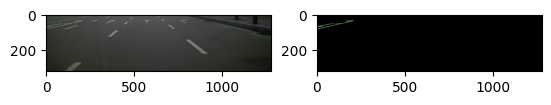

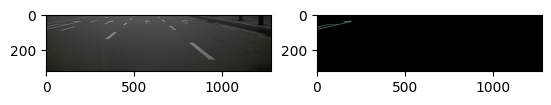

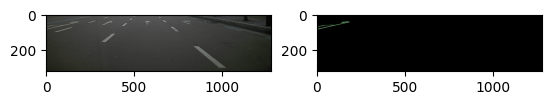

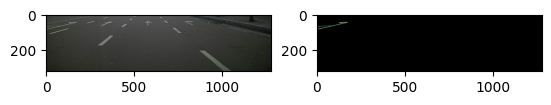

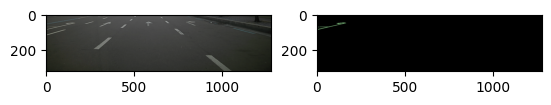

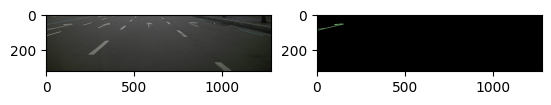

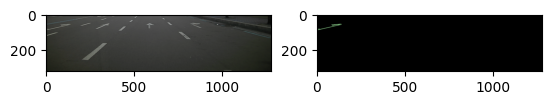

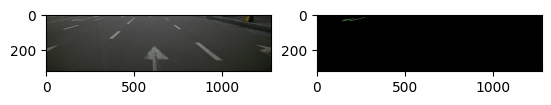

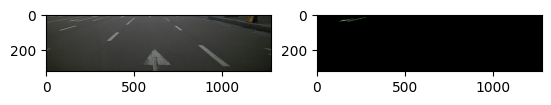

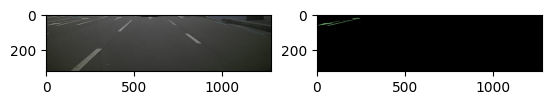

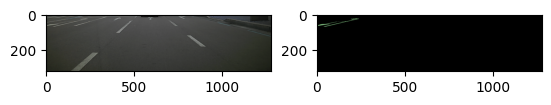

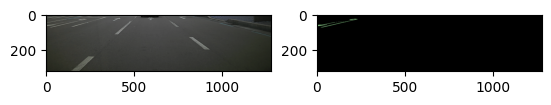

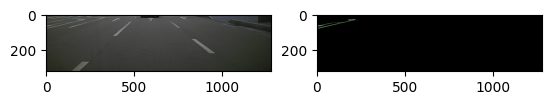

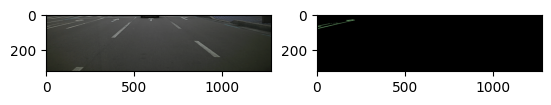

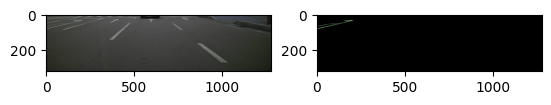

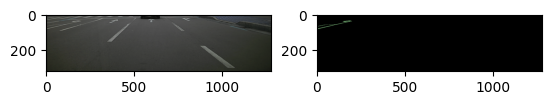

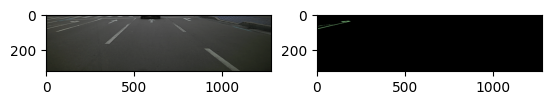

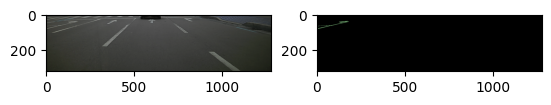

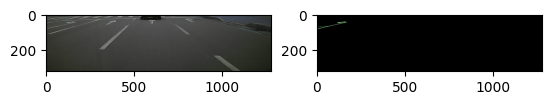

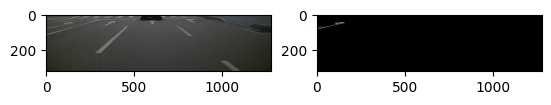

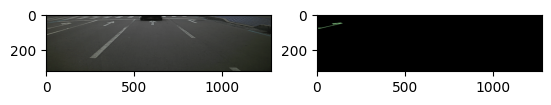

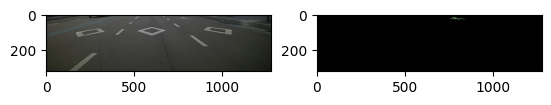

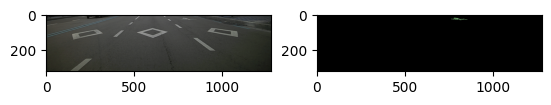

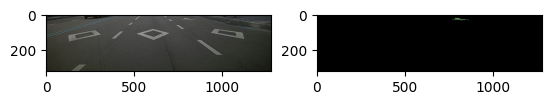

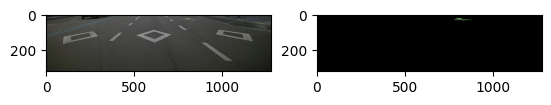

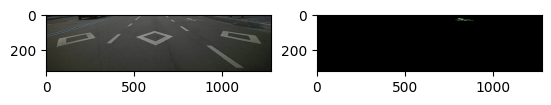

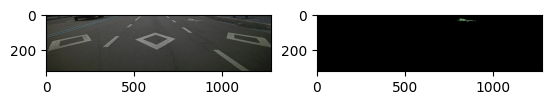

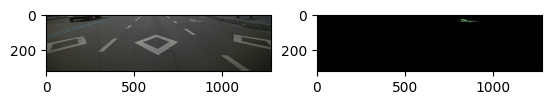

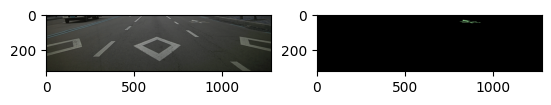

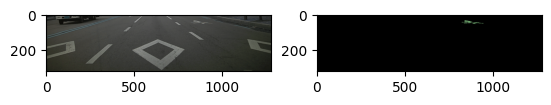

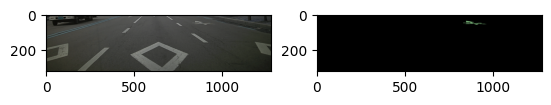

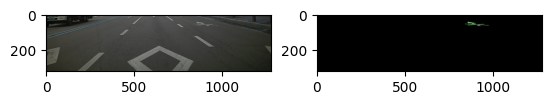

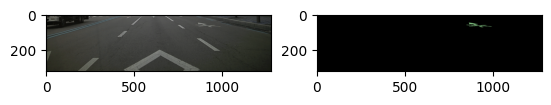

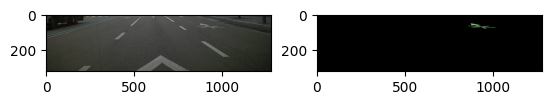

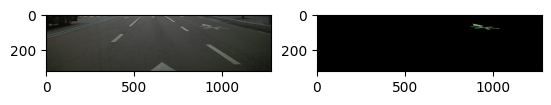

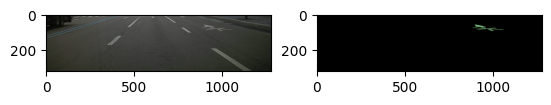

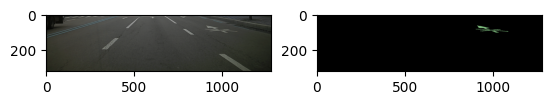

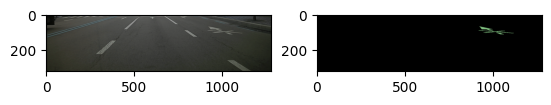

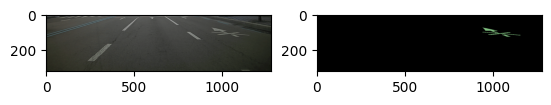

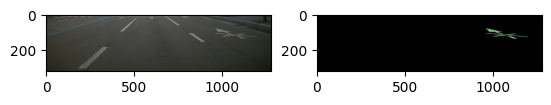

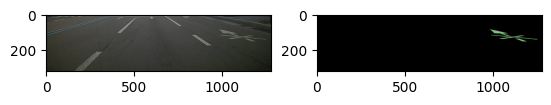

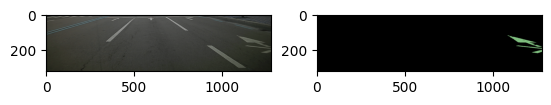

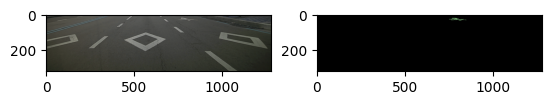

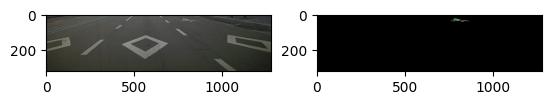

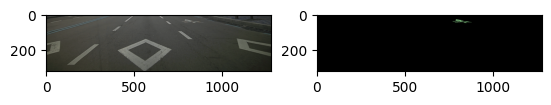

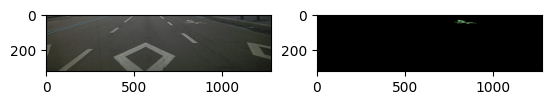

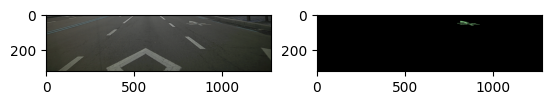

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
for label_path in label_files[16][:50]:
    img_number = label_path[-9:]
    img_path = 'E:\dataset\SeRM\\train\\'+'image_'+img_number
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    label = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=int)
    label[mask==16]=label_infos.id2color[16]
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(image)
    fig.add_subplot(1,2,2)
    plt.imshow(label)
    plt.show()